## I've looked at the images at start

I thought that resizing them can corrupt the dataset and I thought about cropping them instead but they look fine
after resizing

In [ ]:
data_path = '/Users/rafal.michaluk/Downloads/landscape_images'

In [21]:
import PIL
import os
from collections import defaultdict, Counter
from matplotlib.pyplot import hist2d
import matplotlib.pyplot as plt

### Read all jpgs

In [5]:
filenames = os.listdir(data_path)

images = list()
for img_name in filenames:
    print(img_name)
    if img_name[-4:] != '.jpg':
        continue
    img = PIL.Image.open(os.path.join(data_path, img_name))
    
    # PIL bug https://github.com/python-pillow/Pillow/issues/1237
    images.append(img.copy())
    img.close()

63.jpg
823.jpg
4217.jpg
3578.jpg
2666.jpg
2100.jpg
1409.jpg
189.jpg
2114.jpg
4203.jpg
2672.jpg
77.jpg
837.jpg
2882.jpg
3544.jpg
1353.jpg
1435.jpg
3222.jpg
2128.jpg
3236.jpg
1421.jpg
1347.jpg
2896.jpg
3550.jpg
638.jpg
2869.jpg
1390.jpg
604.jpg
2699.jpg
2841.jpg
3587.jpg
162.jpg
176.jpg
2855.jpg
3593.jpg
88.jpg
610.jpg
1384.jpg
2302.jpg
4015.jpg
2470.jpg
4001.jpg
3008.jpg
2316.jpg
3020.jpg
1637.jpg
1151.jpg
2458.jpg
3746.jpg
4029.jpg
3752.jpg
1145.jpg
1623.jpg
3034.jpg
1810.jpg
3961.jpg
3975.jpg
1804.jpg
348.jpg
360.jpg
3785.jpg
406.jpg
1192.jpg
1186.jpg
412.jpg
3791.jpg
3949.jpg
1838.jpg
374.jpg
2276.jpg
3168.jpg
4161.jpg
2510.jpg
1019.jpg
599.jpg
4175.jpg
2504.jpg
2262.jpg
3154.jpg
1743.jpg
1025.jpg
3632.jpg
4149.jpg
3626.jpg
2538.jpg
1031.jpg
1757.jpg
3140.jpg
228.jpg
1964.jpg
3815.jpg
3801.jpg
1970.jpg
214.jpg
1780.jpg
1958.jpg
3197.jpg
2289.jpg
3829.jpg
572.jpg
566.jpg
3183.jpg
1794.jpg
200.jpg
957.jpg
2712.jpg
2074.jpg
1569.jpg
2060.jpg
2706.jpg
3418.jpg
943.jpg
3430.jpg
1227.jpg
1

1545.jpg
1223.jpg
3434.jpg
1974.jpg
238.jpg
3805.jpg
3811.jpg
1960.jpg
1948.jpg
204.jpg
2299.jpg
3187.jpg
3839.jpg
562.jpg
576.jpg
3193.jpg
1784.jpg
210.jpg
3178.jpg
2266.jpg
2500.jpg
4171.jpg
1009.jpg
589.jpg
2514.jpg
4165.jpg
2272.jpg
3144.jpg
1753.jpg
1035.jpg
3622.jpg
2528.jpg
4159.jpg
3636.jpg
1021.jpg
1747.jpg
3150.jpg
1800.jpg
3971.jpg
3965.jpg
358.jpg
1814.jpg
370.jpg
3795.jpg
416.jpg
1182.jpg
1196.jpg
402.jpg
3959.jpg
3781.jpg
364.jpg
1828.jpg
2312.jpg
4005.jpg
2474.jpg
1169.jpg
4011.jpg
2460.jpg
2306.jpg
3018.jpg
3030.jpg
1627.jpg
1141.jpg
3756.jpg
4039.jpg
2448.jpg
3742.jpg
1155.jpg
1633.jpg
3024.jpg
628.jpg
2879.jpg
1380.jpg
614.jpg
2851.jpg
3597.jpg
2689.jpg
172.jpg
166.jpg
2845.jpg
3583.jpg
98.jpg
600.jpg
1394.jpg
73.jpg
2676.jpg
4207.jpg
3568.jpg
2110.jpg
1419.jpg
199.jpg
2104.jpg
2662.jpg
4213.jpg
827.jpg
67.jpg
2892.jpg
3554.jpg
1343.jpg
1425.jpg
3232.jpg
9.jpg
3226.jpg
2138.jpg
1431.jpg
1357.jpg
2886.jpg
3540.jpg
2163.jpg
4274.jpg
2605.jpg
698.jpg
840.jpg
14.jpg
1318.

1645.jpg
2364.jpg
2402.jpg
4073.jpg
2416.jpg
4067.jpg
3708.jpg
1679.jpg
2370.jpg
3085.jpg
306.jpg
1692.jpg
460.jpg
4098.jpg
474.jpg
1686.jpg
312.jpg
3091.jpg
1876.jpg
3907.jpg
448.jpg
3913.jpg
1862.jpg
1725.jpg
3132.jpg
3654.jpg
1043.jpg
1057.jpg
3640.jpg
3898.jpg
2238.jpg
3126.jpg
1731.jpg
2210.jpg
1719.jpg
3668.jpg
4107.jpg
2576.jpg
4113.jpg
2562.jpg
299.jpg
2204.jpg
272.jpg
514.jpg
1080.jpg
2589.jpg
3697.jpg
3683.jpg
1094.jpg
500.jpg
266.jpg
1902.jpg
3873.jpg
528.jpg
3867.jpg
1916.jpg
1241.jpg
2748.jpg
2990.jpg
3456.jpg
3330.jpg
1527.jpg
1533.jpg
3324.jpg
2984.jpg
3442.jpg
919.jpg
1255.jpg
2774.jpg
4305.jpg
931.jpg
2012.jpg
3318.jpg
2006.jpg
925.jpg
1269.jpg
2760.jpg
4311.jpg
2953.jpg
3495.jpg
1282.jpg
716.jpg
702.jpg
1296.jpg
2947.jpg
3481.jpg
3480.jpg
2946.jpg
1297.jpg
703.jpg
717.jpg
1283.jpg
3494.jpg
2952.jpg
2007.jpg
3319.jpg
4310.jpg
2761.jpg
1268.jpg
924.jpg
930.jpg
4304.jpg
2775.jpg
2013.jpg
3325.jpg
1532.jpg
1254.jpg
918.jpg
3443.jpg
2985.jpg
3457.jpg
2991.jpg
2749.jpg
1240

3924.jpg
4093.jpg
319.jpg
1855.jpg
2384.jpg
2390.jpg
1699.jpg
1841.jpg
3930.jpg
4087.jpg
443.jpg
3918.jpg
325.jpg
1869.jpg
331.jpg
457.jpg
1128.jpg
4050.jpg
2421.jpg
2347.jpg
3059.jpg
1896.jpg
1882.jpg
2353.jpg
4044.jpg
2435.jpg
3703.jpg
480.jpg
1114.jpg
1672.jpg
3065.jpg
3071.jpg
1666.jpg
1100.jpg
494.jpg
3717.jpg
4078.jpg
2409.jpg
2186.jpg
3298.jpg
2838.jpg
4291.jpg
4285.jpg
669.jpg
2192.jpg
127.jpg
2804.jpg
641.jpg
899.jpg
655.jpg
2810.jpg
133.jpg
2145.jpg
2623.jpg
4252.jpg
866.jpg
26.jpg
872.jpg
32.jpg
2637.jpg
4246.jpg
3529.jpg
2151.jpg
1458.jpg
3267.jpg
2179.jpg
1470.jpg
1316.jpg
682.jpg
3501.jpg
3515.jpg
696.jpg
1302.jpg
1464.jpg
3273.jpg
3503.jpg
680.jpg
1314.jpg
18.jpg
858.jpg
1472.jpg
3265.jpg
3271.jpg
1466.jpg
1300.jpg
3517.jpg
4278.jpg
2609.jpg
1328.jpg
24.jpg
864.jpg
4250.jpg
2621.jpg
2147.jpg
3259.jpg
2153.jpg
4244.jpg
2635.jpg
30.jpg
870.jpg
643.jpg
2806.jpg
125.jpg
131.jpg
2812.jpg
657.jpg
4293.jpg
119.jpg
2184.jpg
2190.jpg
1499.jpg
4287.jpg
3067.jpg
2379.jpg
1670.jpg
1

2480.jpg
3946.jpg
1189.jpg
582.jpg
1016.jpg
3601.jpg
2279.jpg
3167.jpg
1770.jpg
1764.jpg
3173.jpg
3615.jpg
1002.jpg
596.jpg
4152.jpg
2523.jpg
1994.jpg
2245.jpg
2251.jpg
1980.jpg
1758.jpg
3629.jpg
4146.jpg
2537.jpg
541.jpg
227.jpg
233.jpg
555.jpg
3826.jpg
4191.jpg
3198.jpg
2286.jpg
1957.jpg
1943.jpg
2292.jpg
3832.jpg
4185.jpg
569.jpg
1572.jpg
3365.jpg
3403.jpg
958.jpg
1214.jpg
780.jpg
794.jpg
1200.jpg
2709.jpg
3417.jpg
3371.jpg
1566.jpg
3359.jpg
2047.jpg
964.jpg
1228.jpg
2721.jpg
2735.jpg
970.jpg
2053.jpg
743.jpg
2906.jpg
2912.jpg
757.jpg
2084.jpg
2090.jpg
1599.jpg
1598.jpg
2091.jpg
2085.jpg
756.jpg
2913.jpg
2907.jpg
742.jpg
971.jpg
2734.jpg
2052.jpg
2046.jpg
3358.jpg
2720.jpg
1229.jpg
965.jpg
3416.jpg
2708.jpg
1201.jpg
795.jpg
1567.jpg
3370.jpg
3364.jpg
1573.jpg
781.jpg
1215.jpg
959.jpg
3402.jpg
2293.jpg
1942.jpg
568.jpg
4184.jpg
3833.jpg
4190.jpg
3827.jpg
1956.jpg
2287.jpg
3199.jpg
232.jpg
554.jpg
540.jpg
226.jpg
1759.jpg
1981.jpg
2250.jpg
2536.jpg
4147.jpg
3628.jpg
2522.jpg
4153.jpg


"\nmaxsize = max(sizesX + sizesY)\nhist2d(sizesX, sizesY, bins=[20, 20], range=[[0, maxsize], [0, maxsize]])\nplt.colorbar()\nplt.xlabel('dim1')\nplt.ylabel('dim2')\n\nplt.show()\n\nplt.hist(ratios, bins=100)\nplt.show()\n\nplt.hist(ratios, bins=100, range=(0, 3))\nplt.show()\n\nq = 2\n"

In [23]:
modes = Counter([img.mode for img in images])
modes

Counter({'RGB': 4278, 'L': 3, 'CMYK': 1})

### Checking distribution of image sizes

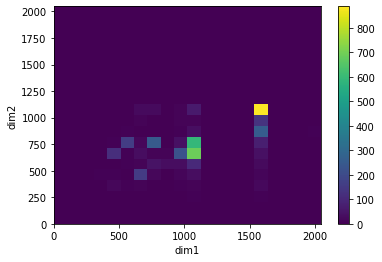

In [9]:
x = [img.size[0] for img in images]
y = [img.size[1] for img in images]

maxsize = max(x + y)
hist2d(x, y, bins=[20, 20], range=[[0, maxsize], [0, maxsize]])
plt.colorbar()
plt.xlabel('dim1')
plt.ylabel('dim2')

plt.show()

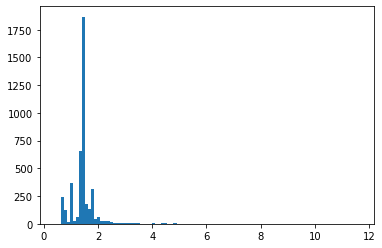

In [6]:
ratios = [img.size[0] / img.size[1] for img in images]
plt.hist(ratios, bins=100)
plt.show()

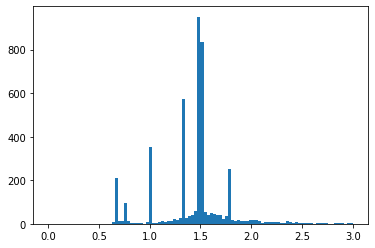

In [8]:
ratios = [img.size[0] / img.size[1] for img in images]
plt.hist(ratios, bins=100, range=(0, 3))
plt.show()

In [12]:
bad_ratio = [img for img in images if  1.45 < img.size[0] / img.size[1] < 1.55 ]
print(len(bad_ratio))

1873


### Looking at some of the images that have bad ratio in resized version

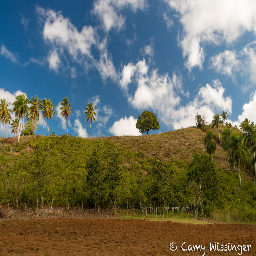

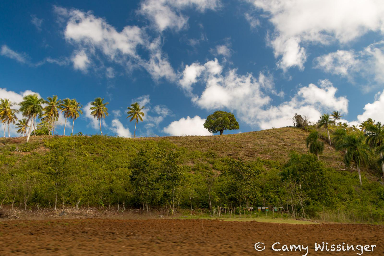

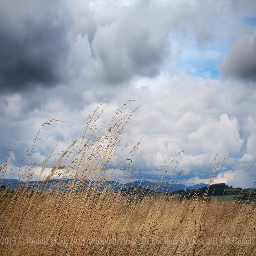

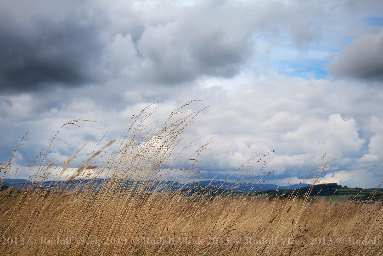

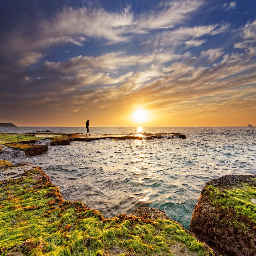

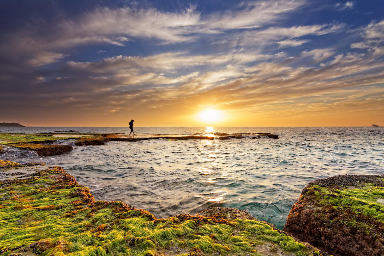

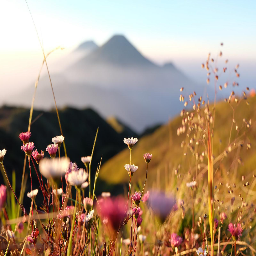

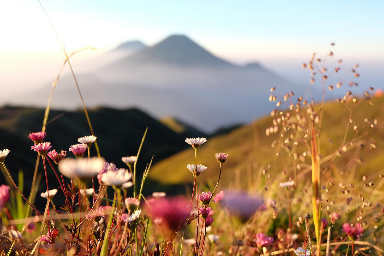

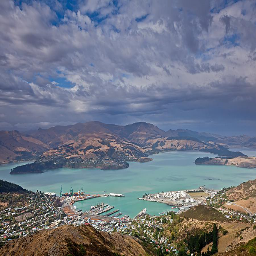

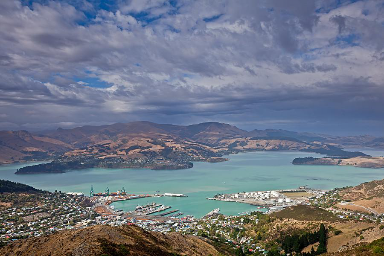

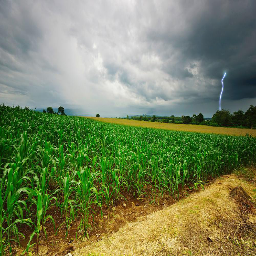

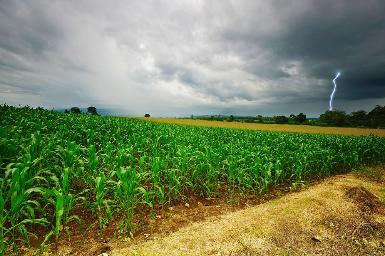

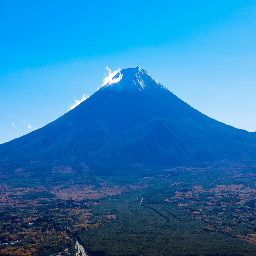

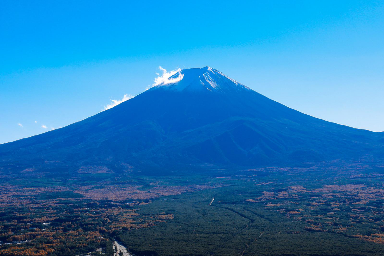

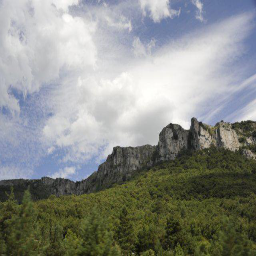

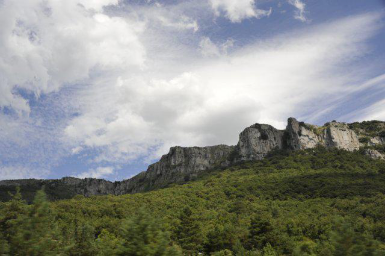

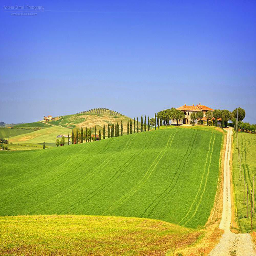

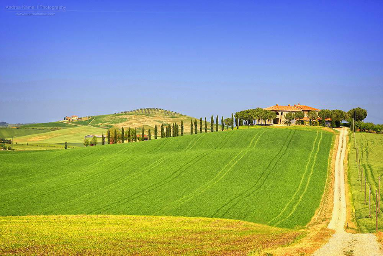

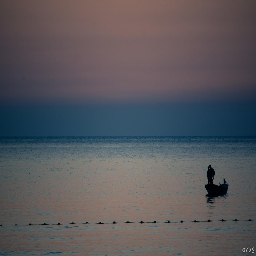

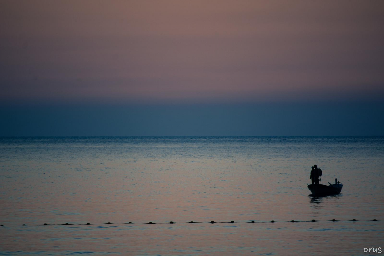

In [20]:
import torchvision.transforms as T

resize = T.Compose([T.ToTensor(),
                    T.Resize(size=(256,256))
                   ])
scale = T.Compose([T.ToTensor(),
                    T.Resize(size=256)
                   ])

for img in bad_ratio[:10]:
    data = resize(img)
    display(T.ToPILImage()(data))
    
    data = scale(img)
    display(T.ToPILImage()(data))

# Implementation

I've started with images in RGB (greyscale -> network -> RGB image), but the images seemed low resolution and had some glitches
The code is in rgb directory

I've used MSE loss as it seems the most natural there (it's regression task)

### Example images here (10 images from every epoch)
https://app.neptune.ai/rm360179/image-coloring/e/IM-111/all?path=&attribute=generated_image

### Another approach

Then I took a look at the paper: http://richzhang.github.io/colorization/
and realised that by using RGB format we can't use input grayscale image in generating the result image, which may make the objects lose "shape" (and therfore reduce resolution)
So I've implemented a little different model that uses LAB format (it has grayscale as first channel and colors are encoded in second and third channel). Our model looks like that:

RGB -> LAB

LAB -> (grayscale, colors)

grayscale -> NETWORK -> colors

final image = grayscale + colors

### Example images here (10 images from every epoch)
https://app.neptune.ai/rm360179/image-coloring/e/IM-118/all?path=&attribute=generated_image

### Model imprevements
I've added few covolutions and deconvolutions(instead of upsampling) to make the model better + I've loaded more complicated resnet model (more classes)

### Different loss + brighter colors
As the network doesn't know anything about the colors, and some objects can have very intense, but diverse colors (like a dress can have intense red/intense blue color), guessing one of the extreme colors can be risky and the model learns to make the colors very "grayish"

I've decided to improve the loss a little and added value that punishes the network if the colors aren't too intense (this is modified by "alpha" parameter and "loss_type"

I've tried two ways for the loss. One is simply punishing the network if the colors are not extreme

`return (-y_pred**2).mean()`

The other is punishing the network if the ground truth color was extreme, but our network guessed the "safe" color (but the loss ignores in what way the color was extreme)

`return ((abs(y_pred) - abs(y))**2).mean()`

This approach made the colors a little brighter and more vibrant

### Example images here, first loss (10 images from every epoch)
https://app.neptune.ai/rm360179/image-coloring/e/IM-115/all?path=&attribute=generated_image

https://app.neptune.ai/rm360179/image-coloring/e/IM-108/all?path=&attribute=generated_image

### Example images here, second loss (10 images from every epoch)
https://app.neptune.ai/rm360179/image-coloring/e/IM-117/all?path=&attribute=generated_image

Or with higher alpha and thus brighter colors:
https://app.neptune.ai/rm360179/image-coloring/e/IM-108/all?path=&attribute=generated_image

The code is available at:

https://github.com/ravmi/image-colorization

And the experiment results at:

https://app.neptune.ai/rm360179/image-coloring